In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import create_pitch
from pandas.io.json import json_normalize
#from pandas.json_normalize import json_normalize
from ipykernel import kernelapp as app

In [3]:
import json        ## importing json module

## loading the competitions.json file 
with open('competitions.json') as comp_file:
    comp_data = json.load(comp_file)
    
## if you will see the comp_data you will find
## that the La Liga 2008-09 competition has id number 11
## and the season id is 41
comp = 11
season_id = 1

In [4]:
## load all the matches from this competition
with open('../stats_bomb/matches/' + str(comp) + '/' + str(season_id) + '.json',encoding="utf8") as match_file:
    match_data = json.load(match_file)

## now finding home team and away team
## home team: Real Madrid
## away team: Barcelona
## match id: None(set by default)
home_team = 'Real Madrid'
away_team = 'Barcelona'
match_id = None
score = None

In [5]:
## iterating through each match to find the match_id
for match in match_data:
    home_team_value = (match['home_team']['home_team_name'] == home_team)
    away_team_value = (match['away_team']['away_team_name'] == away_team)
    
    if home_team_value and away_team_value:
        match_id = match['match_id']
        score = str(match['home_score']) + ' : ' + str(match['away_score'])

In [6]:
## checking if the match is found or not
## if found then displaying the right result
if match_id != None:
    print('{} vs {} has match id: {}'.format(home_team, away_team, match_id))
    print('Score: {}'.format(score))
else:
    print('No match found')

Real Madrid vs Barcelona has match id: 9736
Score: 0 : 3


In [7]:
## let's try to find all the results for Barcelona for
## La Liga season 2008-09
for match in match_data:
    home_team_value = match['home_team']['home_team_name'] 
    away_team_value = match['away_team']['away_team_name'] 
    
    if home_team_value == 'Barcelona' or away_team_value == 'Barcelona':
        score = str(match['home_score']) + ' : ' + str(match['away_score'])
        print('{} vs {}, score: {}'.format(home_team_value, away_team_value, score))

Las Palmas vs Barcelona, score: 1 : 1
Barcelona vs Real Betis, score: 2 : 0
Atlético Madrid vs Barcelona, score: 1 : 1
Barcelona vs Leganés, score: 3 : 1
Athletic Bilbao vs Barcelona, score: 0 : 2
Barcelona vs Celta Vigo, score: 2 : 2
Barcelona vs Levante, score: 3 : 0
Leganés vs Barcelona, score: 0 : 3
Eibar vs Barcelona, score: 0 : 2
Villarreal vs Barcelona, score: 0 : 2
Barcelona vs Sevilla, score: 2 : 1
Barcelona vs Málaga, score: 2 : 0
Deportivo La Coruna vs Barcelona, score: 2 : 4
Barcelona vs Girona, score: 6 : 1
Real Betis vs Barcelona, score: 0 : 5
Real Madrid vs Barcelona, score: 0 : 3
Barcelona vs Real Sociedad, score: 1 : 0
Getafe vs Barcelona, score: 1 : 2
Barcelona vs Real Madrid, score: 2 : 2
Barcelona vs Deportivo La Coruna, score: 4 : 0
Barcelona vs Espanyol, score: 5 : 0
Barcelona vs Deportivo Alavés, score: 2 : 1
Deportivo Alavés vs Barcelona, score: 0 : 2
Celta Vigo vs Barcelona, score: 2 : 2
Barcelona vs Valencia, score: 2 : 1
Real Sociedad vs Barcelona, score: 2 :

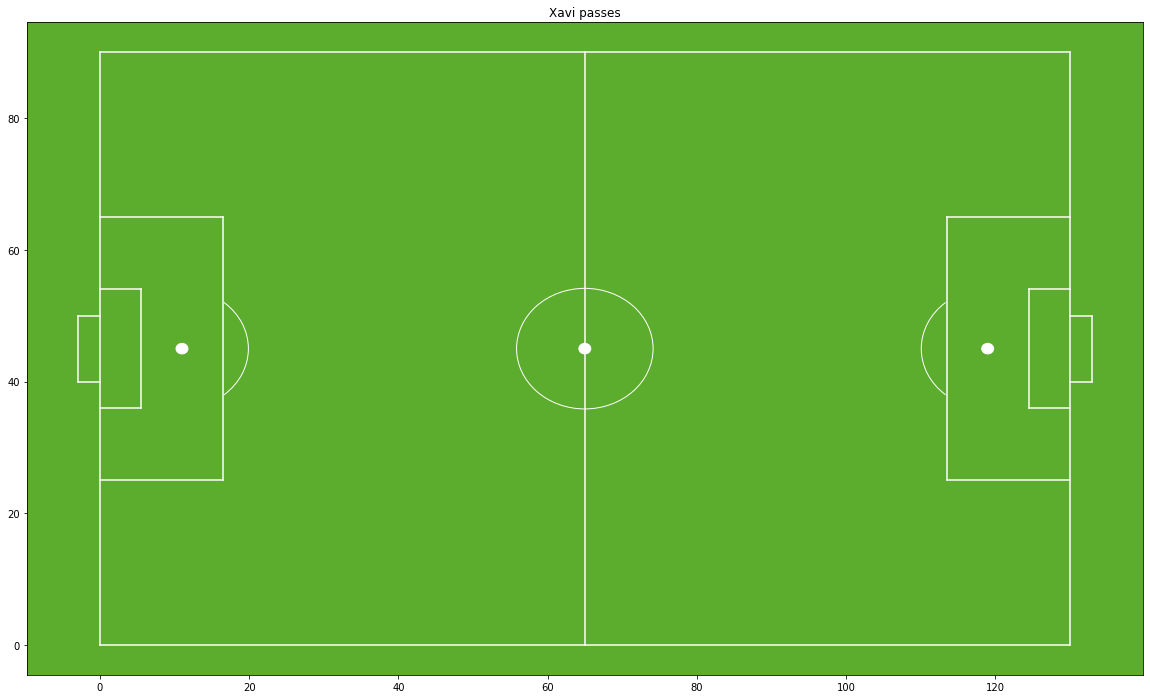

(<Figure size 1440x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1eec1daa6a0>)

In [8]:
create_pitch.create_pitch('Xavi passes')

In [22]:
match_id = 9736
home_team = 'Real Madrid'
away_team = 'Barcelona'
player_name = 'Sergio Busquets i Burgos' #Sergio Busquets Burgos

## this is the name of our event data file for
## our required El Clasico
file_name = str(match_id) + '.json'

## loading the required event data file
my_data = json.load(open('events/' + file_name, 'r', encoding='utf-8'))

## get the nested structure into a dataframe 
## store the dataframe in a dictionary with the match id as key
df = json_normalize(my_data, sep='_').assign(match_id = file_name[:-5])

## making the list of all column names
column = list(df.columns)

## all the type names we have in our dataframe
all_type_name = list(df['type_name'].unique())

## creating a data frame for pass
## and then removing the null values
## only listing the player_name in the dataframe
pass_df = df.loc[df['type_name'] == 'Pass', :].copy()
pass_df.dropna(inplace=True, axis=1)
pass_df = pass_df.loc[pass_df['player_name'] == player_name, :]

## creating a data frame for ball receipt
## removing all the null values
## and only listing Barcelona players in the dataframe
breceipt_df = df.loc[df['type_name'] == 'Ball Receipt*', :].copy()
breceipt_df.dropna(inplace=True, axis=1)
breceipt_df = breceipt_df.loc[breceipt_df['team_name'] == 'Barcelona', :]

pass_comp, pass_no = 0, 0

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


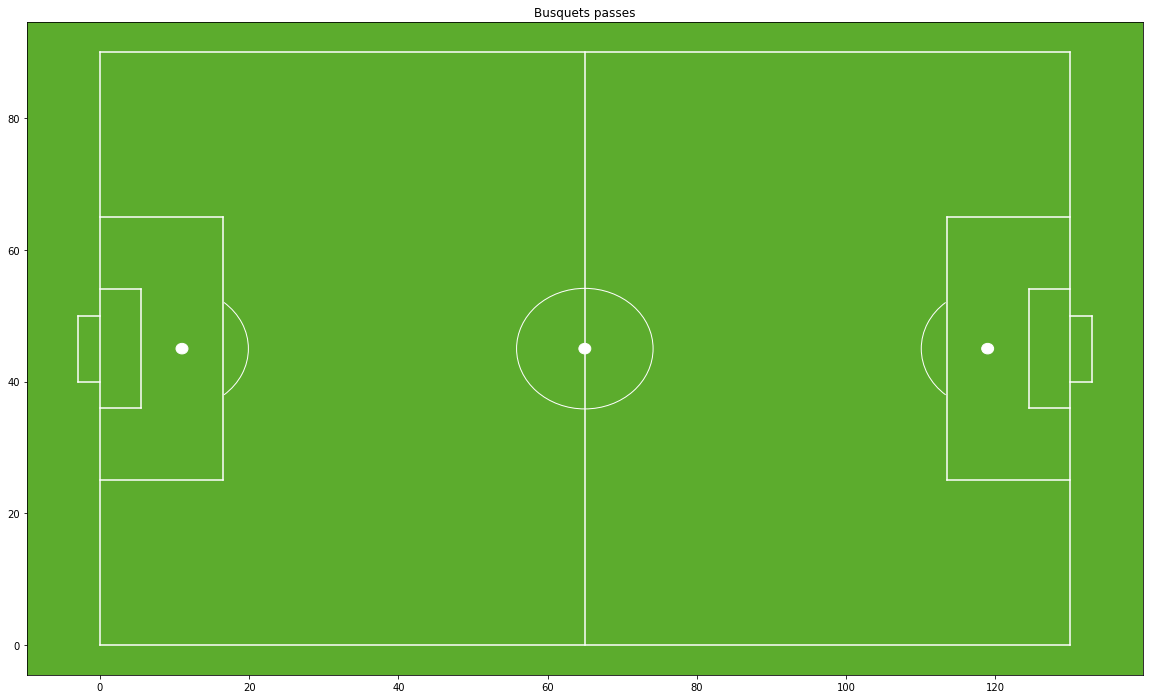

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [25]:
pitch_length_X = 130
pitch_width_Y = 90

(fig,ax) = create_pitch.create_pitch('Busquets passes')

## match id for our El Clasico
match_id = 9736
home_team = 'Real Madrid'
away_team = 'Barcelona'
player_name = 'Sergio Busquets i Burgos'

## this is the name of our event data file for
## our required El Clasico
file_name = str(match_id) + '.json'

## loading the required event data file
my_data = json.load(open('events/' + file_name, 'r', encoding='utf-8'))

## get the nested structure into a dataframe 
## store the dataframe in a dictionary with the match id as key
df = json_normalize(my_data, sep='_').assign(match_id = file_name[:-5])

## making the list of all column names
column = list(df.columns)

## all the type names we have in our dataframe
all_type_name = list(df['type_name'].unique())

## creating a data frame for pass
## and then removing the null values
## only listing the player_name in the dataframe
pass_df = df.loc[df['type_name'] == 'Pass', :].copy()
pass_df.dropna(inplace=True, axis=1)
pass_df = pass_df.loc[pass_df['player_name'] == player_name, :]

## creating a data frame for ball receipt
## removing all the null values
## and only listing Barcelona players in the dataframe
breceipt_df = df.loc[df['type_name'] == 'Ball Receipt*', :].copy()
breceipt_df.dropna(inplace=True, axis=1)
breceipt_df = breceipt_df.loc[breceipt_df['team_name'] == 'Barcelona', :]

pass_comp, pass_no = 0, 0
## pass_comp: completed pass
## pass_no: unsuccessful pass

## iterating through the pass dataframe
for row_num, passed in pass_df.iterrows():   
    
    if passed['player_name'] == player_name:
        ## for away side
        x_loc = passed['location'][0]
        y_loc = passed['location'][1]
        
        pass_id = passed['id']
        summed_result = sum(breceipt_df.iloc[:, 14].apply(lambda x: pass_id in x))
        
        if summed_result > 0:
            ## if pass made was successful
            color = 'blue'
            label = 'Successful'
            pass_comp += 1
        else:
            ## if pass made was unsuccessful
            color = 'red'
            label = 'Unsuccessful'
            pass_no += 1
        
        ## plotting circle at the player's position
        shot_circle = plt.Circle((pitch_length_X - x_loc, y_loc), radius=2, color=color, label=label)
        shot_circle.set_alpha(alpha=0.2)
        ax.add_patch(shot_circle)
        
        ## parameters for making the arrow
        pass_x = 130 - passed['pass_end_location'][0]
        pass_y = passed['pass_end_location'][1] 
        dx = ((pitch_length_X - x_loc) - pass_x)
        dy = y_loc - pass_y
        
        ## making an arrow to display the pass
        pass_arrow = plt.Arrow(pitch_length_X - x_loc, y_loc, -dx, -dy, width=1, color=color)
        
        ## adding arrow to the plot
        ax.add_patch(pass_arrow)

## computing pass accuracy
pass_acc = (pass_comp / (pass_comp + pass_no)) * 100
pass_acc = str(round(pass_acc, 2))

## adding text to the plot
plt.text(20, 85, '{} pass map vs Real Madrid'.format(player_name), fontsize=15)
plt.text(20, 82, 'Pass Accuracy: {}'.format(pass_acc), fontsize=15)

## handling labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='best', bbox_to_anchor=(0.9, 1, 0, 0), fontsize=12)

## editing the figure size and saving it
fig.set_size_inches(12, 8)
fig.savefig('{} pass map.jpg'.format(player_name), dpi=200)

## showing the plot
plt.show()